In [38]:
import rasterio
import geopandas as gpd
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import lightgbm as lgbm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from numpy import *
import numpy as np

In [39]:
lit=[]
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200204//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200110//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200314//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200406//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200410//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200206//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200506//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200510//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20200306//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210104//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210105//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210209//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210304//Sampled//SD.shp')
###lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210308//Sampled//SD.shp')

#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210107//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210203//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210205//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210207//Sampled//SD.shp')
#lit.append('C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Hardangervidda/Dates/20210211//Sampled//SD.shp')

In [40]:
path = 'C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates/'

lit = glob.glob(path + '*//Sampled//*.shp')
#lit = glob.glob(path + '*04*//Sampled//*.shp')
#lit2 = glob.glob(path + '*03*//Sampled//*.shp')
#lit3 = glob.glob(path + '*04*//Sampled//*.shp')

#lit.extend(lit2)
#lit.extend(lit3)

i = 0
for item in lit:
    pts = gpd.read_file(item)
    if i != 0:
        df_train = pd.concat([df_train,pts])
        print(i)
        print(df_train.shape,'shape of df')
        print(item)
    else: 
        df_train = pts
        i=i+1   
#df_train.to_file(outdir + 'SD_concat.shp')   

1
(4472, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190117\Sampled\SD.shp
1
(5358, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190117_2\Sampled\SD.shp
1
(5370, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190121\Sampled\SD.shp
1
(6368, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190202\Sampled\SD.shp
1
(7346, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190203\Sampled\SD.shp
1
(9117, 14) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190210\Sampled\SD.shp
1
(12712, 15) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190215\Sampled\SD.shp
1
(13628, 15) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/dates\20190215_2\Sampled\SD.shp
1
(14802, 15) shape of df
C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norw

In [41]:
df = df_train
sd = pd.to_numeric(df['SD'])
df['SD'] = pd.to_numeric(sd)
df = df[df['SD'] > 0]
df = df[df['SD'] < 6]

In [42]:
df['SD'].mean()

1.3347677073723723

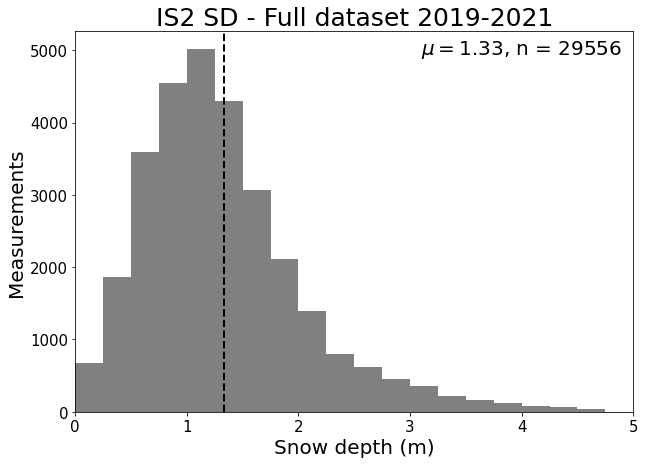

In [43]:
root = 'C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)'
plt.figure(figsize = (10, 7))
plt.title('IS2 SD - Full dataset 2019-2021', fontsize=25)
plt.xlabel('Snow depth (m)', fontsize = 20)
plt.ylabel('Measurements', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,5)

bins = np.arange(0,5,0.25)

plt.axvline(df['SD'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.text(3.1, 4950,  r'$\mu=1.33$, n = 29556', fontsize = 20)

plt.hist(df['SD'], bins = bins, color='grey', label='Elevation difference')

plt.savefig(root + r'/Figures/ICESat-2 SD_All_years_new.png', dpi = 600)
#plt.legend(loc='upper left', prop={'size': 14})

In [44]:
df

,AT_dist,SD,pho_qt,beaminfo,beam,VH1k,CS1k,VH2k,CS2k,VH1k_N,CS1k_N,VH2k_N,CS2k_N,geometry,date
39,24500.0,0.857343,269.60,strong beam,gt1l,NaN,NaN,NaN,NaN,-1.295972,-0.784379,-1.460925,-0.905011,POINT (205224.600 6888123.883),NaN
40,25000.0,0.759240,274.12,strong beam,gt1l,NaN,NaN,NaN,NaN,-1.440712,-0.899555,-1.436763,-0.918215,POINT (205214.612 6888623.994),NaN
41,25500.0,0.620075,277.86,strong beam,gt1l,NaN,NaN,NaN,NaN,-1.387372,-1.007425,-1.447052,-0.934148,POINT (205205.013 6889124.111),NaN
42,26000.0,0.434652,265.02,strong beam,gt1l,NaN,NaN,NaN,NaN,-1.679158,-1.08245,-1.483904,-0.972408,POINT (205195.337 6889624.295),NaN
43,26500.0,0.244801,313.94,strong beam,gt1l,NaN,NaN,NaN,NaN,-1.666613,-1.143034,-1.541869,-0.990002,POINT (205185.785 6890124.510),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,110500.0,3.118980,264.52,strong beam,gt3r,None,None,None,None,0.398822,1.279782,0.80452,1.652332,POINT (171889.623 6953431.300),20210429
1475,111000.0,3.115380,244.86,strong beam,gt3r,None,None,None,None,-0.059305,1.19802,0.942064,1.808537,POINT (171886.899 6953931.680),20210429
1476,111500.0,3.120185,254.58,strong beam,gt3r,None,None,None,None,-0.170772,1.342586,0.89584,1.901179,POINT (171883.545 6954432.254),20210429
1482,114500.0,4.727370,270.18,strong beam,gt3r,None,None,None,None,1.084425,1.972183,1.065621,2.036045,POINT (171864.675 6957434.277),20210429


In [45]:
#df = gpd.read_file(path)
#df2 = gpd.read_file(path2)
#df3 = gpd.read_file(path3)
#df = pd.concat([df,df2,df3])
df = df_train
#df = df[df['beaminfo'] == 'strong beam']

sd = pd.to_numeric(df['SD'])

 
df["VH1k"].fillna(df["VH1k_N"], inplace=True)
df["VH2k"].fillna(df["VH2k_N"], inplace=True)
df["CS1k"].fillna(df["CS1k_N"], inplace=True)
df["CS2k"].fillna(df["CS2k_N"], inplace=True)
# convert column "a" of a DataFrame
df['SD'] = pd.to_numeric(sd)
df = df[df['SD'] > 0]
df = df[df['SD'] < 6]
df = df[df['VH2k'] > -2]
df = df[df['CS2k'] > -2]
df = df[df['VH1k'] > -2]
df = df[df['CS1k'] > -2]

#df = df[df['pho_qt'] > 50]
outdir = 'C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/Training_Data/'
df.to_file(outdir + 'SD_concat_All_Visualize.shp')

#df.loc[df['CS2k'] < 0 ,'CS2k'] = 0
#df.loc[df['CS2k'] < 0 ,'SD'] = 0
#df.loc[df['SD'] < 0.5 ,'SD'] = 0
#df.loc[df['SD'] < 0.5 ,'CS2k'] = 0

#df = df[df['SD'] > 1]
#df.loc[:,'CS2k'] += 10
#df.loc[:,'SD'] += 10

In [46]:
df =df.sample(frac=1)

In [47]:
df

,AT_dist,SD,pho_qt,beaminfo,beam,VH1k,CS1k,VH2k,CS2k,VH1k_N,CS1k_N,VH2k_N,CS2k_N,geometry,date
1419,118000.0,1.573035,225.12,strong beam,gt2l,0.805845,0.258309,0.766419,0.104557,0.7163,0.189253,0.752038,0.011918,POINT (98432.028 6760419.368),20190311
2304,156500.0,1.499080,8.42,weak beam,gt3l,1.064133,-0.142188,0.700516,-0.240798,1.064133,-0.142188,0.700516,-0.240798,POINT (98242.882 6819871.829),20210207
427,55500.0,0.547960,246.94,strong beam,gt2l,-0.886582,0.027823,-1.067099,-0.012017,-0.886582,0.027823,-1.067099,-0.012017,POINT (207696.814 6912521.109),NaN
2994,51500.0,1.323194,308.92,strong beam,gt3r,1.341761,0.378229,1.419636,0.184856,NaN,NaN,NaN,NaN,POINT (50156.077 6675296.930),20210209_2
1382,78500.0,0.888856,143.46,strong beam,gt2l,1.013652,-0.251594,1.121206,-0.220995,1.051724,-0.229742,1.105157,-0.242313,POINT (70656.516 6699054.024),20190413_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,18000.0,0.697214,20.62,weak beam,gt3l,-0.273290,-1.570381,-0.305441,-1.365774,-0.27329,-1.570381,-0.305441,-1.365774,POINT (198020.893 6911534.124),20200202
1242,11000.0,1.285721,281.22,strong beam,gt3r,0.531247,-0.514273,0.309202,-0.590987,0.719338,-0.336103,0.332295,-0.662538,POINT (154121.248 6769096.217),20210331
1396,45000.0,2.344129,23.46,strong beam,gt2r,0.967066,-0.410030,0.986329,-0.231715,0.967066,-0.41003,0.986329,-0.231715,POINT (178207.329 6935582.796),20200306
453,96000.0,2.137898,36.62,strong beam,gt1r,0.246077,0.977668,0.818619,0.934012,0.22826,1.251808,0.733927,0.962714,POINT (17836.897 6777420.833),20210316


In [48]:
df.head(50)

,AT_dist,SD,pho_qt,beaminfo,beam,VH1k,CS1k,VH2k,CS2k,VH1k_N,CS1k_N,VH2k_N,CS2k_N,geometry,date
1419,118000.0,1.573035,225.12,strong beam,gt2l,0.805845,0.258309,0.766419,0.104557,0.7163,0.189253,0.752038,0.011918,POINT (98432.028 6760419.368),20190311
2304,156500.0,1.499080,8.42,weak beam,gt3l,1.064133,-0.142188,0.700516,-0.240798,1.064133,-0.142188,0.700516,-0.240798,POINT (98242.882 6819871.829),20210207
427,55500.0,0.547960,246.94,strong beam,gt2l,-0.886582,0.027823,-1.067099,-0.012017,-0.886582,0.027823,-1.067099,-0.012017,POINT (207696.814 6912521.109),NaN
2994,51500.0,1.323194,308.92,strong beam,gt3r,1.341761,0.378229,1.419636,0.184856,NaN,NaN,NaN,NaN,POINT (50156.077 6675296.930),20210209_2
1382,78500.0,0.888856,143.46,strong beam,gt2l,1.013652,-0.251594,1.121206,-0.220995,1.051724,-0.229742,1.105157,-0.242313,POINT (70656.516 6699054.024),20190413_2
3617,242000.0,0.519179,149.72,strong beam,gt3r,-0.479801,-0.193449,-0.314180,-0.014933,-0.4335,-0.145271,-0.323913,-0.065633,POINT (83145.777 6711338.069),20210308
3230,250000.0,0.565623,66.68,weak beam,gt3r,1.125190,0.302103,0.813581,-0.099177,1.12519,0.302103,0.813581,-0.099177,POINT (123399.035 6919003.090),20210104
99,54500.0,1.078301,243.76,strong beam,gt1l,-1.235234,0.325976,-0.939285,0.221982,None,None,None,None,POINT (21778.622 6597820.776),20190417
2367,211000.0,3.030182,60.92,weak beam,gt2r,3.947348,1.900503,3.969791,1.868711,3.988232,1.98336,3.945712,1.889057,POINT (70716.179 6746737.572),20190414
974,75500.0,0.448682,258.82,strong beam,gt3r,1.316015,-0.066854,1.356964,0.154179,None,None,None,None,POINT (48772.645 6605684.369),20210209


(array([ 3557., 10075.,  8213.,  3265.,  1246.,   607.,   283.,   123.,
           41.,    20.]),
 array([1.97685404e-04, 5.98864484e-01, 1.19753128e+00, 1.79619808e+00,
        2.39486488e+00, 2.99353168e+00, 3.59219848e+00, 4.19086528e+00,
        4.78953207e+00, 5.38819887e+00, 5.98686567e+00]),
 <BarContainer object of 10 artists>)

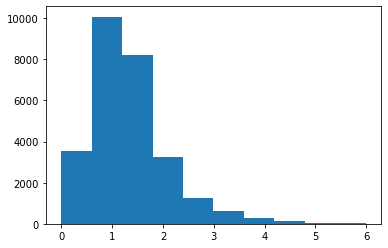

In [49]:
plt.hist(df.SD, bins=10)

In [50]:
df['SD_int'] = df['SD'].round(0)
df['SD_int'] = df['SD_int'].astype('int')
samplesize = 500
df1 = df[(df['SD'] > 0) & (df['SD'] < 0.5)].head(300)
df2 = df[(df['SD'] > 0.5) & (df['SD'] < 1)].head(samplesize)
df3 = df[(df['SD'] > 1) & (df['SD'] < 1.5)].head(samplesize)
df4 = df[(df['SD'] > 1.5) & (df['SD'] < 2)].head(samplesize)
df5 = df[(df['SD'] > 2) & (df['SD'] < 2.5)].head(samplesize)
df6 = df[(df['SD'] > 2.5) & (df['SD'] < 3)].head(samplesize)
df7 = df[(df['SD'] > 3) & (df['SD'] < 3.5)].head(samplesize)
df8 = df[(df['SD'] > 3.5) & (df['SD'] < 4)].head(samplesize)
df9 = df[df['SD'] > 4].head(samplesize)


df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
#outdir = 'C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)/Norway/Training_Data/'
#df.to_file(outdir + 'SD_concat_4.shp')
#df1
#df2

In [51]:
df

,AT_dist,SD,pho_qt,beaminfo,beam,VH1k,CS1k,VH2k,CS2k,VH1k_N,CS1k_N,VH2k_N,CS2k_N,geometry,date,SD_int
974,75500.0,0.448682,258.82,strong beam,gt3r,1.316015,-0.066854,1.356964,0.154179,None,None,None,None,POINT (48772.645 6605684.369),20210209,0
2483,85500.0,0.333532,63.84,weak beam,gt3l,0.484550,0.183733,0.161728,-0.269402,0.437503,0.264496,0.2297,-0.041741,POINT (50792.470 6709356.260),20210209_2,0
2204,108000.0,0.459600,143.36,strong beam,gt3l,0.043535,-0.196359,0.585245,-0.772507,0.500862,-0.681423,0.587622,-0.701809,POINT (117146.031 6764435.419),20190409,0
376,95500.0,0.479751,38.30,weak beam,gt1r,0.816699,-0.570181,0.861216,-0.324371,0.816699,-0.570181,0.861216,-0.324371,POINT (162648.555 6819197.067),20190308,0
1423,100500.0,0.228885,5.40,weak beam,gt2l,-0.578459,-0.220321,-1.250862,-0.842306,-1.369031,-0.898349,-1.233472,-0.831012,POINT (90576.439 6719369.084),20210205_2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,138500.0,4.104658,189.24,strong beam,gt2r,4.805169,3.265055,4.770149,2.866946,4.805169,3.265055,4.770149,2.866946,POINT (73409.943 6834071.819),20200314,4
1265,305000.0,5.096524,292.82,strong beam,gt1r,3.746893,2.552402,3.129091,2.131047,NaN,NaN,NaN,NaN,POINT (38257.522 6670959.204),20200314,5
1939,313500.0,4.253810,69.14,weak beam,gt2l,5.949242,4.165160,5.945850,4.228970,NaN,NaN,NaN,NaN,POINT (32712.115 6660988.221),20200314,4
616,317500.0,4.178060,75.72,weak beam,gt1l,7.405357,5.851516,6.410122,4.776889,NaN,NaN,NaN,NaN,POINT (35524.911 6658819.303),20200314,4


(array([386., 624., 632., 598., 555., 565., 282., 125.,  39.,  20.]),
 array([3.35820896e-03, 6.01708955e-01, 1.20005970e+00, 1.79841045e+00,
        2.39676119e+00, 2.99511194e+00, 3.59346269e+00, 4.19181343e+00,
        4.79016418e+00, 5.38851493e+00, 5.98686567e+00]),
 <BarContainer object of 10 artists>)

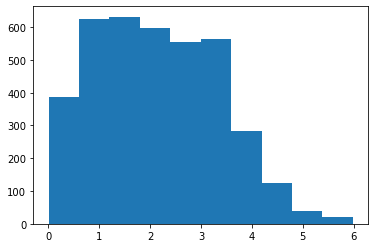

In [52]:
plt.hist(df.SD, bins=10)

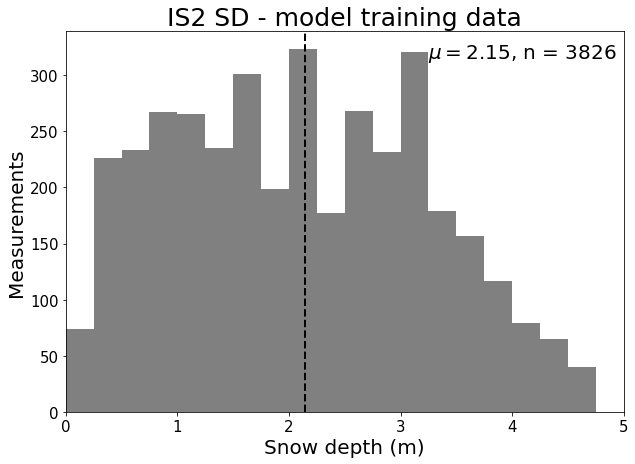

In [53]:
root = 'C:/Users/Rasmus/Mit drev (thesis20212022@gmail.com)'
plt.figure(figsize = (10, 7))
plt.title('IS2 SD - model training data', fontsize=25)
plt.xlabel('Snow depth (m)', fontsize = 20)
plt.ylabel('Measurements', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,5)

bins = np.arange(0,5,0.25)

plt.axvline(df['SD'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.text(3.25, 315,  r'$\mu=2.15$, n = 3826', fontsize = 20)

plt.hist(df['SD'], bins = bins, color='grey', label='Elevation difference')

plt.savefig(root + r'/Figures/ICESat-2 SD_training_data.png', dpi = 600)
#plt.legend(loc='upper left', prop={'size': 14})

In [54]:
df['SD'].mean()

2.143307137515776

In [55]:
df

,AT_dist,SD,pho_qt,beaminfo,beam,VH1k,CS1k,VH2k,CS2k,VH1k_N,CS1k_N,VH2k_N,CS2k_N,geometry,date,SD_int
974,75500.0,0.448682,258.82,strong beam,gt3r,1.316015,-0.066854,1.356964,0.154179,None,None,None,None,POINT (48772.645 6605684.369),20210209,0
2483,85500.0,0.333532,63.84,weak beam,gt3l,0.484550,0.183733,0.161728,-0.269402,0.437503,0.264496,0.2297,-0.041741,POINT (50792.470 6709356.260),20210209_2,0
2204,108000.0,0.459600,143.36,strong beam,gt3l,0.043535,-0.196359,0.585245,-0.772507,0.500862,-0.681423,0.587622,-0.701809,POINT (117146.031 6764435.419),20190409,0
376,95500.0,0.479751,38.30,weak beam,gt1r,0.816699,-0.570181,0.861216,-0.324371,0.816699,-0.570181,0.861216,-0.324371,POINT (162648.555 6819197.067),20190308,0
1423,100500.0,0.228885,5.40,weak beam,gt2l,-0.578459,-0.220321,-1.250862,-0.842306,-1.369031,-0.898349,-1.233472,-0.831012,POINT (90576.439 6719369.084),20210205_2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,138500.0,4.104658,189.24,strong beam,gt2r,4.805169,3.265055,4.770149,2.866946,4.805169,3.265055,4.770149,2.866946,POINT (73409.943 6834071.819),20200314,4
1265,305000.0,5.096524,292.82,strong beam,gt1r,3.746893,2.552402,3.129091,2.131047,NaN,NaN,NaN,NaN,POINT (38257.522 6670959.204),20200314,5
1939,313500.0,4.253810,69.14,weak beam,gt2l,5.949242,4.165160,5.945850,4.228970,NaN,NaN,NaN,NaN,POINT (32712.115 6660988.221),20200314,4
616,317500.0,4.178060,75.72,weak beam,gt1l,7.405357,5.851516,6.410122,4.776889,NaN,NaN,NaN,NaN,POINT (35524.911 6658819.303),20200314,4


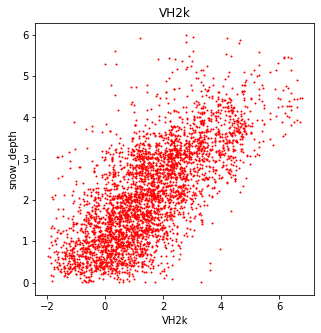

In [56]:
plt.figure(figsize=(5, 5))
plt.title('VH2k')
plt.xlabel('VH2k')
plt.ylabel('snow_depth')
#plt.xlim([-21, -17])
#plt.ylim([0, 4])
plt.scatter(df.VH2k, df.SD, color='red',s=1);
#plt.scatter(df.VH1k, df.SD, color='green',s=1);


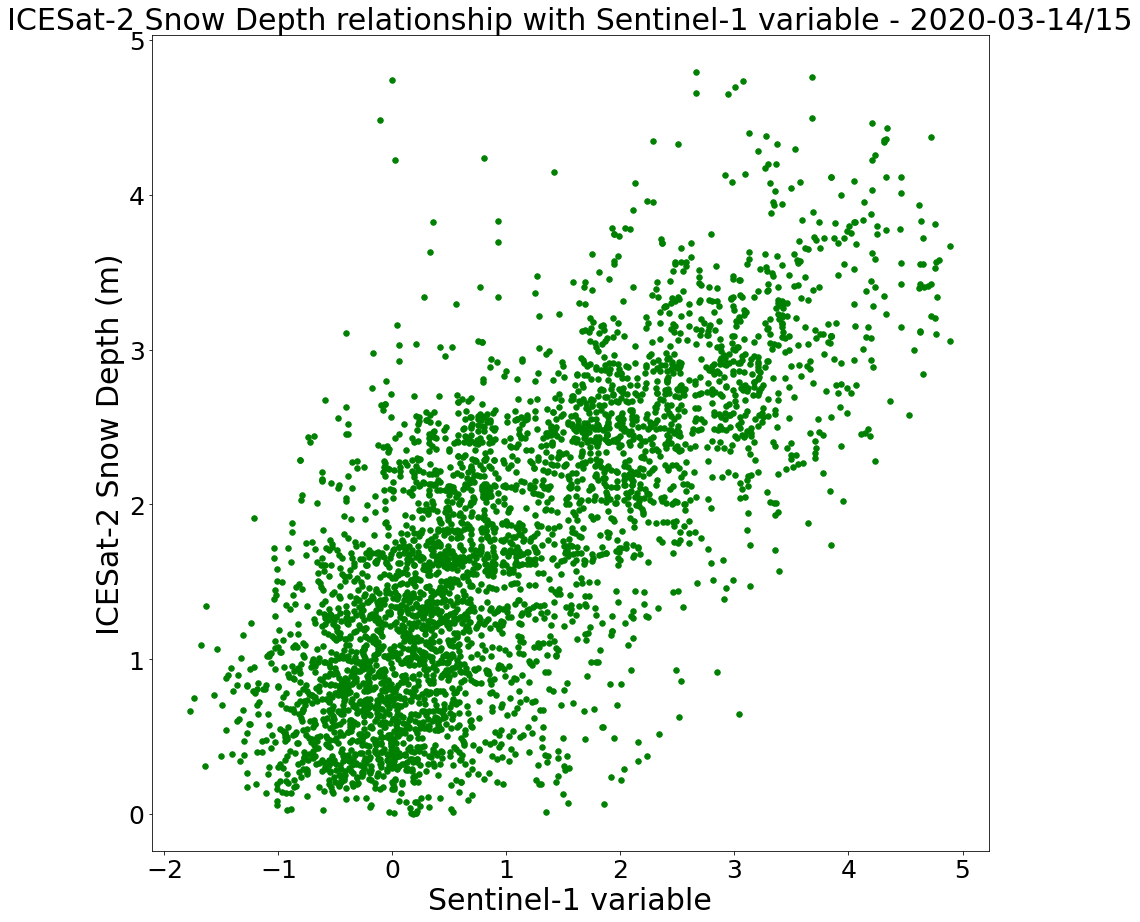

In [57]:
fig_root = r'C:\Users\Rasmus\Mit drev (thesis20212022@gmail.com)\Figures'
df['SD'] = df['SD'] * 0.8
plt.figure(figsize=(15, 15))
plt.title('ICESat-2 Snow Depth relationship with Sentinel-1 variable - 2020-03-14/15', fontsize=30)
plt.xlabel('Sentinel-1 variable', fontsize=30)
plt.ylabel('ICESat-2 Snow Depth (m)', fontsize=30)
#plt.xlim([-1, 7])
#plt.ylim([0, 7])
plt.scatter(df.CS2k, df.SD, color='green',s=30);
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)

plt.savefig(fig_root + '/4_SD_DDI_Relationship.JPEG', dpi = 600)
#plt.scatter(df.CS1k, df.SD, color='green',s=1);

C:\Users\Rasmus\Anaconda3\envs\snow\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\Rasmus\Anaconda3\envs\snow\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


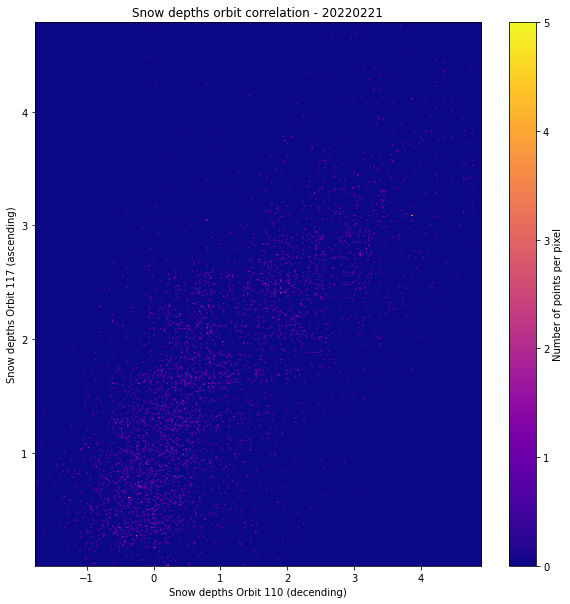

In [58]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.7, '#78d151'),
    (1, '#fde624'),
], N=200000)


def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=plt.cm.plasma)
    fig.colorbar(density, label='Number of points per pixel')
    

fig = plt.figure(figsize=(10, 10))
using_mpl_scatter_density(fig, df.CS2k, df.SD)
plt.title('Snow depths orbit correlation - 20220221')
plt.xlabel('Snow depths Orbit 110 (decending)')
plt.ylabel('Snow depths Orbit 117 (ascending)')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
df_all = df[['SD','VH2k', 'CS2k']]
df = pd.DataFrame(df_all.dropna())

#dict = {'SD': 0, 'VH2k': -2, 'CS2k': -2}

#df = df.append(dict, ignore_index = True)

X = df[['CS2k']]

y = df['SD']

reg = LinearRegression().fit(X, y)
reg.score(X, y)
y_pred = reg.predict(X)

In [60]:
df.sort_values('CS2k', ascending=False)

,SD,VH2k,CS2k
1292,3.053194,6.415441,4.894389
618,3.665910,6.415441,4.894389
2603,3.578409,6.776945,4.793845
616,3.342448,6.410122,4.776889
2604,3.566687,6.700056,4.764048
...,...,...,...
1118,1.345809,-0.335909,-1.633697
2379,0.312631,-0.121315,-1.645962
1619,1.089871,-0.347643,-1.680016
1122,0.747298,-0.402556,-1.742353


In [61]:
df.CS2k.min()

-1.779209235866682

In [62]:
reg.score(X, y)

0.5502826287741225

Text(0, 0.5, 'y - SD')

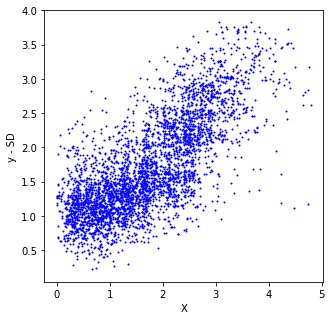

In [63]:
plt.figure(figsize=(5, 5))
#plt.scatter(X, y, color='purple', s=2);
plt.scatter(y, y_pred, color='blue', s=1);
plt.xlabel('X')
plt.ylabel('y - SD')
#plt.xlim([-1, 6])
#plt.ylim([0, 6])

Text(0, 0.5, 'y - SD')

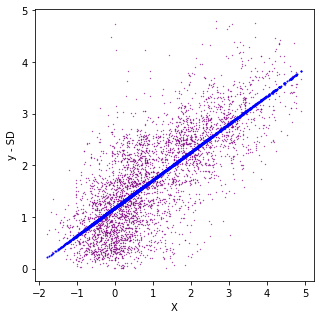

In [64]:
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color='purple', s=0.1);
plt.scatter(X, y_pred, color='blue', s=1);
plt.xlabel('X')
plt.ylabel('y - SD')
#plt.xlim([-1, 6])
#plt.ylim([0, 6])

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
reg = make_pipeline(
PolynomialFeatures(degree=(2)),
LinearRegression(),)
reg.fit(X, y)
y_pred = reg.predict(X)
reg.score(X, y)

0.5503058798572751

(-1.0, 6.0)

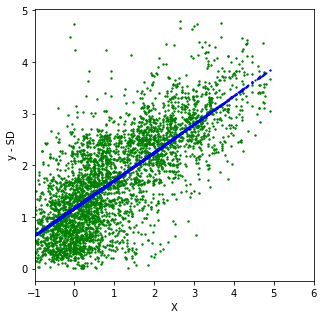

In [66]:
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color='green', s=2);
plt.scatter(X, y_pred, color='blue', s=1);
plt.xlabel('X')
plt.ylabel('y - SD')
plt.xlim([-1, 6])
#plt.ylim([-3, 6])

In [67]:
df_old = df
df['CS2k_old'] = df['CS2k']
df['SD_old'] = df['SD']
df.loc[df['CS2k'] < 0 ,'CS2k'] = 0
df.loc[df['CS2k'] < 0 ,'SD'] = 0
df.loc[df['SD'] < 0.5 ,'SD'] = 0
df.loc[df['SD'] < 0.5 ,'CS2k'] = 0

X_new = df[['CS2k']]

y_new = df['SD']

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
reg = make_pipeline(
PolynomialFeatures(degree=(2)),
LinearRegression(),)
reg.fit(X_new, y_new)
y_pred_new = reg.predict(X_new)
reg.score(X_new, y_new)

0.5854491007084885

(-1.0, 6.0)

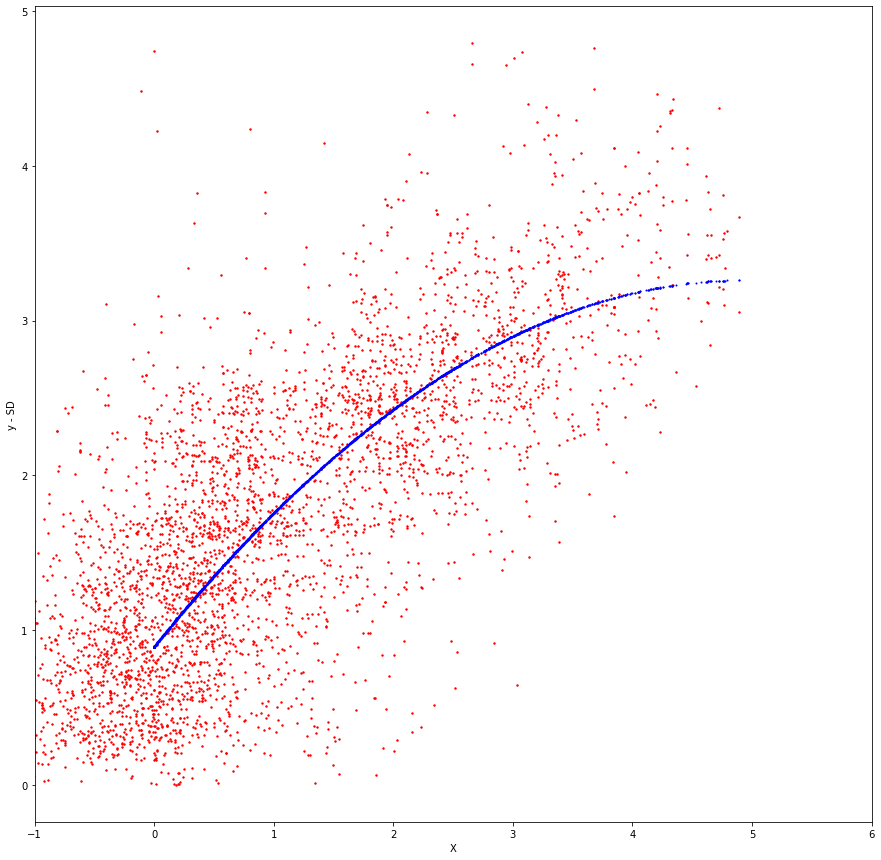

In [69]:
plt.figure(figsize=(15, 15))
#plt.scatter(X, y, color='green', s=2);
#plt.scatter(df_old.CS2k, df_old.SD, color='red', s=2);
plt.scatter(df.CS2k_old, df.SD_old, color='red', s=2);
plt.scatter(X_new, y_pred_new, color='blue', s=1);
plt.xlabel('X')
plt.ylabel('y - SD')
plt.xlim([-1, 6])
#plt.ylim([-3, 6])

In [ ]:
fig_root = r'C:\Users\Rasmus\Mit drev (thesis20212022@gmail.com)\Figures'
#df['SD'] = df['SD'] * 0.8
plt.figure(figsize=(15, 15))
plt.title('Polynomial Regression', fontsize=30)
plt.xlabel('DDI (dB)', fontsize=30)
plt.ylabel('Snow depth (m)', fontsize=30)
plt.xlim([-1, 6])
plt.text(4.2, 0.5, r'$R^2$: 0.604,', fontsize = 25)
plt.text(4.2, 0.25, r'RSME: 0.77 m,', fontsize = 25)
plt.text(4.2, 0, r'MAE: 0.60 m', fontsize = 25)
#plt.ylim([0, 7])
plt.scatter(df.CS2k_old, df.SD_old, color='green', s=20);
plt.scatter(X_new, y_pred_new, color='blue', s=20, label = 'Regression fit');
plt.legend(loc='upper left', prop={'size': 25})
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.savefig(fig_root + '/Multitemporal Polynomial Regression.PNG', dpi = 600)
#plt.scatter(df.CS1k, df.SD, color='green',s=1);

AttributeError: 'function' object has no attribute 'axes'

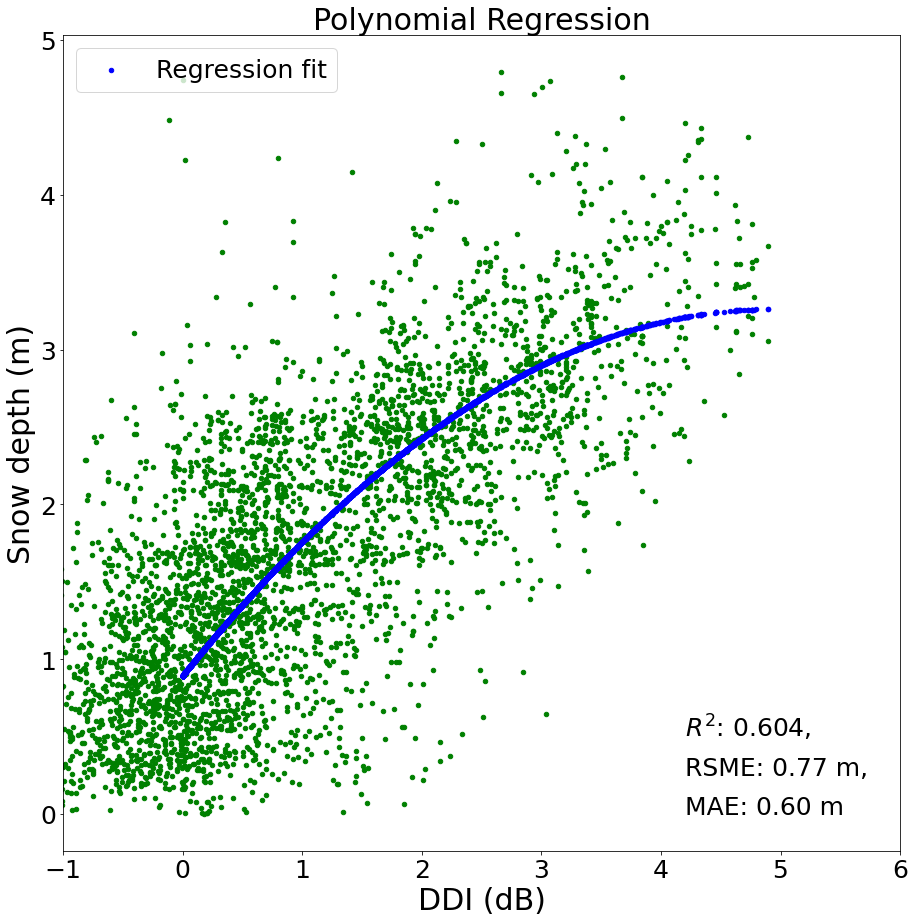

In [98]:
fig_root = r'C:\Users\Rasmus\Mit drev (thesis20212022@gmail.com)\Figures'
#df['SD'] = df['SD'] * 0.8
plt.figure(figsize=(15, 15))
plt.title('Polynomial Regression', fontsize=30)
plt.xlabel('DDI (dB)', fontsize=30)
plt.ylabel('Snow depth (m)', fontsize=30)
plt.xlim([-1, 6])
plt.text(4.2, 0.5, r'$R^2$: 0.604,', fontsize = 25)
plt.text(4.2, 0.25, r'RSME: 0.77 m,', fontsize = 25)
plt.text(4.2, 0, r'MAE: 0.60 m', fontsize = 25)
#plt.ylim([0, 7])
plt.scatter(df.CS2k_old, df.SD_old, color='green', s=20);
plt.scatter(X_new, y_pred_new, color='blue', s=20, label = 'Regression fit');
plt.legend(loc='upper left', prop={'size': 25})
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
#plt.savefig(fig_root + '/Multitemporal Polynomial Regression.PNG', dpi = 600)
#plt.scatter(df.CS1k, df.SD, color='green',s=1);

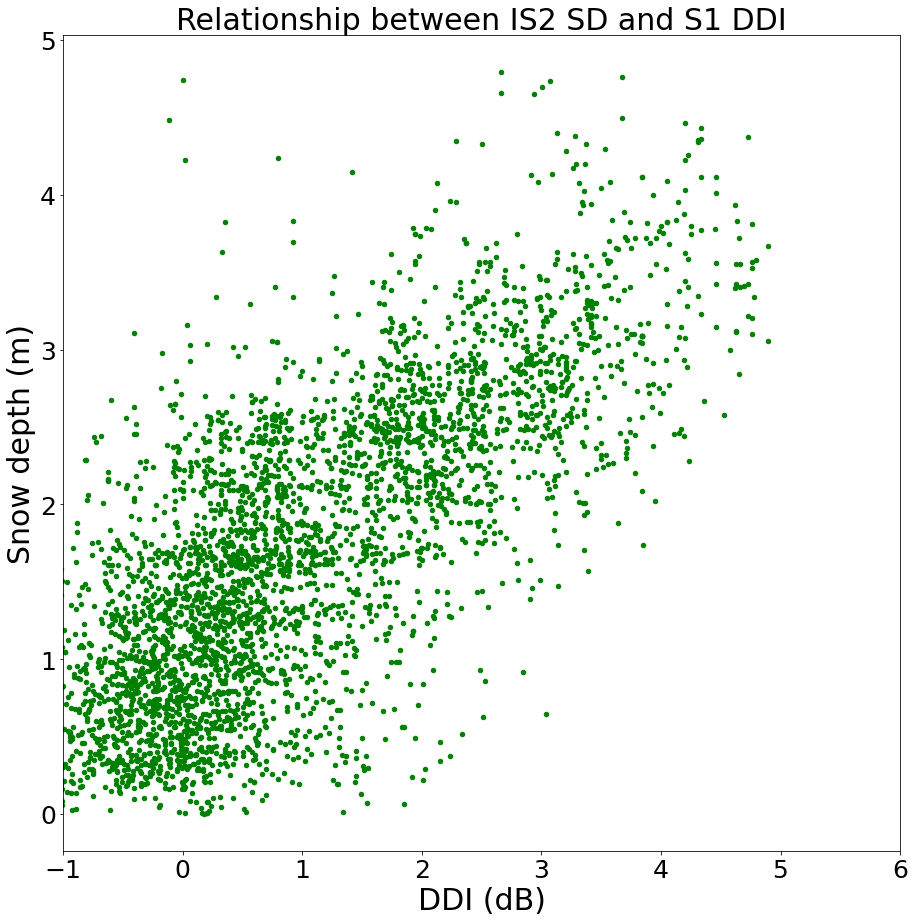

In [97]:
fig_root = r'C:\Users\Rasmus\Mit drev (thesis20212022@gmail.com)\Figures'
#df['SD'] = df['SD'] * 0.8
plt.figure(figsize=(15, 15))
plt.title('Relationship between IS2 SD and S1 DDI', fontsize=30)
plt.xlabel('DDI (dB)', fontsize=30)
plt.ylabel('Snow depth (m)', fontsize=30)
plt.xlim([-1, 6])
#plt.text(-0.9, 4.85, r'R2: 0.604, RSME: 0.77 cm, MAE: 0.60 cm', fontsize = 20)
#plt.ylim([0, 7])
plt.scatter(df.CS2k_old, df.SD_old, color='green', s=20);
#plt.scatter(X_new, y_pred_new, color='blue', s=10);
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)

#plt.savefig(fig_root + '/SD_DDI_Relationship.PNG', dpi = 600)
#plt.scatter(df.CS1k, df.SD, color='green',s=1);